In [117]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Basic Analysis

In [119]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [120]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [121]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [122]:
df_train.shape

(1460, 81)

In [123]:
df_test.shape

(1459, 80)

In [124]:
df_train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [125]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [126]:
for r in df_train.columns:
    print(f"Unique values of {r}'s are: {df_train[r].nunique()}")
    print(f"{df_train[r].unique()}\n")

Unique values of Id's are: 1460
[   1    2    3 ... 1458 1459 1460]

Unique values of MSSubClass's are: 15
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]

Unique values of MSZoning's are: 5
['RL' 'RM' 'C (all)' 'FV' 'RH']

Unique values of LotFrontage's are: 110
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]

Unique values of LotArea's are: 1073
[ 8450  9600 11250 ... 17217 13175  9717]

Unique values of Street's are: 2
['Pave' 'Grvl']

Unique values of Alley's ar


Unique values of BsmtFullBath's are: 4
[1 0 2 3]

Unique values of BsmtHalfBath's are: 3
[0 1 2]

Unique values of FullBath's are: 4
[2 1 3 0]

Unique values of HalfBath's are: 3
[1 0 2]

Unique values of BedroomAbvGr's are: 8
[3 4 1 2 0 5 6 8]

Unique values of KitchenAbvGr's are: 4
[1 2 3 0]

Unique values of KitchenQual's are: 4
['Gd' 'TA' 'Ex' 'Fa']

Unique values of TotRmsAbvGrd's are: 12
[ 8  6  7  9  5 11  4 10 12  3  2 14]

Unique values of Functional's are: 7
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev']

Unique values of Fireplaces's are: 4
[0 1 2 3]

Unique values of FireplaceQu's are: 5
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']

Unique values of GarageType's are: 6
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']

Unique values of GarageYrBlt's are: 97
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.


## Cleaning the Data

In [127]:
df_train['LotFrontage'].fillna(0,inplace=True)
df_train['GarageYrBlt'].fillna(0,inplace=True)
df_train['MasVnrArea'].fillna(0,inplace=True)

In [128]:
e_mode = df_train['Electrical'].mode()[0]
df_train['Electrical'].fillna(e_mode, inplace=True)

In [129]:
df_train['Alley'].fillna('Unknown', inplace=True)
df_train['BsmtQual'].fillna("Unknown", inplace=True)
df_train['BsmtCond'].fillna("Unknown", inplace=True)
df_train['BsmtExposure'].fillna("Unknown", inplace=True)
df_train['BsmtFinType1'].fillna("Unknown", inplace=True)
df_train['BsmtFinType2'].fillna("Unknown", inplace=True)
df_train['FireplaceQu'].fillna("Unknown", inplace=True)
df_train['GarageType'].fillna("Unknown", inplace=True)
df_train['GarageCond'].fillna("Unknown", inplace=True)
df_train['GarageFinish'].fillna("Unknown", inplace=True)
df_train['GarageQual'].fillna("Unknown", inplace=True)
df_train['PoolQC'].fillna("Unknown", inplace=True)
df_train['Fence'].fillna("Unknown", inplace=True)
df_train['MiscFeature'].fillna("Unknown", inplace=True)
df_train['MasVnrType'].fillna("Unknown", inplace=True)

In [130]:
df_train.isnull().sum().sum()

0

In [131]:
df_train.duplicated().sum()

0

#### No Duplicates were found

In [132]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Encoding

In [133]:
numeric_feature = df_train.select_dtypes(include=["int64","float64"]).columns

In [134]:
numeric_feature

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [135]:
categorical_feature = df_train.select_dtypes(exclude=["int64","float64"]).columns

In [136]:
categorical_feature

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [137]:
from sklearn.preprocessing import OrdinalEncoder 
Ord_encoder = OrdinalEncoder()

In [138]:
for i in categorical_feature:
    df_train[[i]] = Ord_encoder.fit_transform(df_train[[i]])
    df_test[[i]] = Ord_encoder.fit_transform(df_test[[i]])

In [139]:
df_train.dtypes.value_counts()

float64    46
int64      35
dtype: int64

In [140]:
df_test.dtypes.value_counts()

float64    54
int64      26
dtype: int64

## Outliers Removal

In [141]:
from scipy import stats

<AxesSubplot:xlabel='SalePrice'>

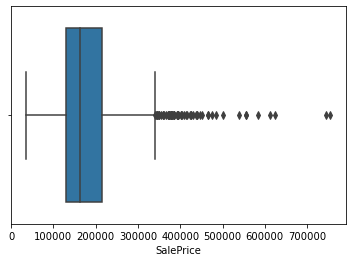

In [142]:
sns.boxplot(x= df_train.SalePrice)

In [143]:
df_train.SalePrice.quantile([.25,.5,.75])

0.25    129975.0
0.50    163000.0
0.75    214000.0
Name: SalePrice, dtype: float64

In [144]:
z = np.abs(stats.zscore(df_train.SalePrice))

In [145]:
df_train.drop(np.where(z>3)[0],axis = 0,inplace = True)

In [146]:
df_train.shape

(1438, 81)

In [147]:
df_train.fillna(method = "bfill", inplace = True )

In [148]:
df_test.fillna(method = "bfill", inplace = True )

<AxesSubplot:xlabel='SalePrice'>

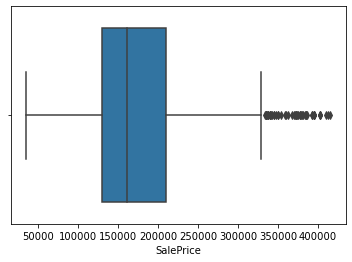

In [149]:
sns.boxplot(x= df_train.SalePrice)

In [150]:
df_train.SalePrice.quantile([.25,.5,.75])

0.25    129500.0
0.50    161500.0
0.75    210000.0
Name: SalePrice, dtype: float64

## Feature Scaling

In [151]:
df_train['MiscFeature']

0       4.0
1       4.0
2       4.0
3       4.0
4       4.0
       ... 
1455    4.0
1456    4.0
1457    2.0
1458    4.0
1459    4.0
Name: MiscFeature, Length: 1438, dtype: float64

In [152]:
feature_set = df_train.drop(['SalePrice'], axis=1)

In [153]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
feature_scaled=feature_set.copy()
feature_scaled=ss.fit_transform(feature_scaled)
feature_scaled=pd.DataFrame(feature_scaled, columns=feature_set.columns)
feature_scaled

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.728655,0.069107,-0.044824,0.224769,-0.196275,0.06473,0.246695,0.743322,0.314741,-0.02638,...,-0.267702,-0.063968,0.059069,0.459731,0.193108,-0.088361,-1.603976,0.135271,0.30484,0.217867
1,-1.726286,-0.871730,-0.044824,0.659670,-0.080602,0.06473,0.246695,0.743322,0.314741,-0.02638,...,-0.267702,-0.063968,0.059069,0.459731,0.193108,-0.088361,-0.493293,-0.618682,0.30484,0.217867
2,-1.723918,0.069107,-0.044824,0.311749,0.085362,0.06473,0.246695,-1.388786,0.314741,-0.02638,...,-0.267702,-0.063968,0.059069,0.459731,0.193108,-0.088361,0.987617,0.135271,0.30484,0.217867
3,-1.721550,0.304316,-0.044824,0.079802,-0.085632,0.06473,0.246695,-1.388786,0.314741,-0.02638,...,-0.267702,-0.063968,0.059069,0.459731,0.193108,-0.088361,-1.603976,-1.372634,0.30484,-3.425069
4,-1.719181,0.069107,-0.044824,0.775644,0.388122,0.06473,0.246695,-1.388786,0.314741,-0.02638,...,-0.267702,-0.063968,0.059069,0.459731,0.193108,-0.088361,2.098299,0.135271,0.30484,0.217867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,1.717255,0.069107,-0.044824,0.137789,-0.249886,0.06473,0.246695,0.743322,0.314741,-0.02638,...,-0.267702,-0.063968,0.059069,0.459731,0.193108,-0.088361,0.617389,-0.618682,0.30484,0.217867
1434,1.719623,-0.871730,-0.044824,0.804637,0.278988,0.06473,0.246695,0.743322,0.314741,-0.02638,...,-0.267702,-0.063968,0.059069,-1.384323,0.193108,-0.088361,-1.603976,1.643176,0.30484,0.217867
1435,1.721991,0.304316,-0.044824,0.253763,-0.136728,0.06473,0.246695,0.743322,0.314741,-0.02638,...,-0.267702,-0.063968,0.059069,-3.228378,-4.721753,4.914610,-0.493293,1.643176,0.30484,0.217867
1436,1.724360,-0.871730,-0.044824,0.311749,-0.068834,0.06473,0.246695,0.743322,0.314741,-0.02638,...,-0.267702,-0.063968,0.059069,0.459731,0.193108,-0.088361,-0.863521,1.643176,0.30484,0.217867


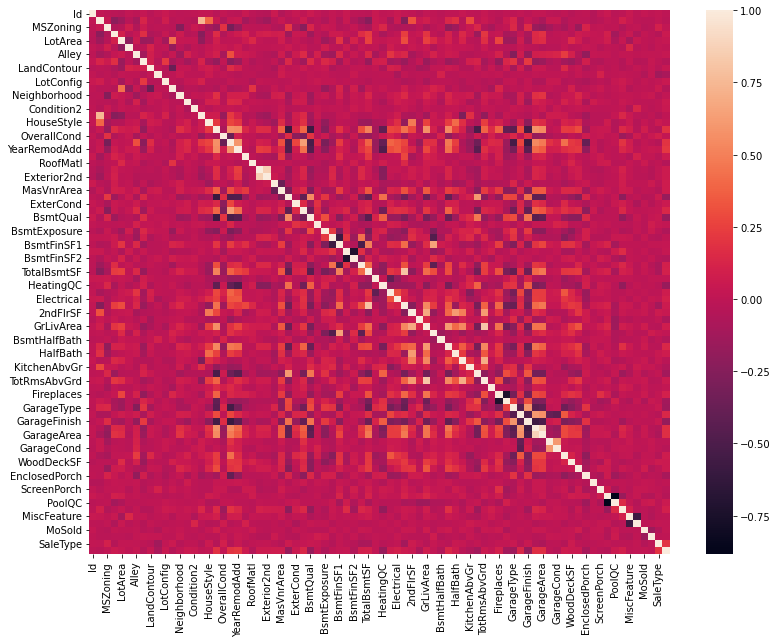

In [154]:
plt.figure(figsize=(13,10))
sns.heatmap(feature_scaled.corr())
plt.show()

In [155]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k=50)

In [156]:
X.fillna(method = "bfill", inplace = True )

In [157]:
X_selected = fs.fit_transform(X, y)

In [158]:
X_selected

array([[3.000e+00, 6.500e+01, 8.450e+03, ..., 0.000e+00, 4.000e+00,
        4.000e+00],
       [3.000e+00, 8.000e+01, 9.600e+03, ..., 0.000e+00, 4.000e+00,
        4.000e+00],
       [3.000e+00, 6.800e+01, 1.125e+04, ..., 0.000e+00, 4.000e+00,
        4.000e+00],
       ...,
       [3.000e+00, 6.600e+01, 9.042e+03, ..., 0.000e+00, 0.000e+00,
        4.000e+00],
       [3.000e+00, 6.800e+01, 9.717e+03, ..., 1.120e+02, 4.000e+00,
        4.000e+00],
       [3.000e+00, 7.500e+01, 9.937e+03, ..., 0.000e+00, 4.000e+00,
        4.000e+00]])

In [159]:
X_selected.shape

(1438, 50)

## Model

In [160]:
X = df_train.drop(['SalePrice'], axis=1) 
y = df_train['SalePrice']

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Decision Tree

In [163]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

dtree_predict = dtree.predict(X_test)

dtree_accuracy = dtree.score(X_test, y_test)

#### XGB Regressor

In [164]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

xgb_predict = xgb.predict(X_test)

xgb_accuracy = xgb.score(X_test, y_test)

#### Random Forest

In [165]:
ran_fo = RandomForestRegressor()
ran_fo.fit(X_train, y_train)

ran_fo_predict = ran_fo.predict(X_test)

ran_fo_accuracy = ran_fo.score(X_test, y_test) 

#### Linear Regression

In [166]:
linear = LinearRegression()
linear.fit(X_train, y_train)

linear_predict = linear.predict(X_test)

linear_accuracy =  linear.score(X_test, y_test)

In [167]:
mc = pd.DataFrame({'Model': ['Decision Tree', 'XGB Regressor', 'Random Forest', 'Linear Regression'], 'Score': [linear_accuracy, dtree_accuracy, ran_fo_accuracy, xgb_accuracy]})
mc_s = mc.sort_values(by = 'Score', ascending = False)
mc_s = mc_s.set_index('Score')
mc_s

,Model
Score,
0.853375,Decision Tree
0.825511,Random Forest
0.803247,Linear Regression
0.689141,XGB Regressor


In [168]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(xgb, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 16293.018 (1524.774)


In [169]:
pred = xgb.predict(X_test)

### Using Ridge

In [170]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [171]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(cv=cv, scoring='neg_mean_absolute_error')
model.fit(X_train, y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

print(model.alpha_)

Mean MAE: 18432.373 (2626.256)
10.0


In [172]:
pred1 = model.predict(X_test)

### Using Lasso

In [173]:
from sklearn.linear_model import Lasso
las = Lasso(alpha=1.0)
las.fit(X_train,y_train)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(las, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 18690.523 (3068.125)


In [174]:
pred2 = las.predict(X_test)

In [175]:
# Comparing Accuray between Ridge and Lasso
ridge_train_accuracy = model.score(X_train, y_train)
ridge_test_accuracy = model.score(X_test, y_test)
print("Ridge train accuracy:",ridge_train_accuracy)
print("Ridge test accuracy:",ridge_test_accuracy)
print("\n")

las_train_accuracy = model.score(X_train, y_train)
las_test_accuracy = las.score(X_test, y_test)
print("Lasso train accuracy:",las_train_accuracy)
print("Lasso test accuracy:",las_test_accuracy)

Ridge train accuracy: 0.8581344439128487
Ridge test accuracy: 0.8539701340008173


Lasso train accuracy: 0.8581344439128487
Lasso test accuracy: 0.8534189235572284
